<a href="https://colab.research.google.com/github/ContextLab/cs-for-psych/blob/master/slides/module_4/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install davos
import davos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.6 MB/s eta 0:00:00


# Overview
This notebook provides an overview of some different types of plots you can make in Python.  We'll be using several sample datasets that come with the scikit-learn Python toolbox:
  - `boston`: Boston house prices dataset
  - `digits`: images of hand-drawn numerals
  - `wine`: wine characteristics

We'll explore these datasets (and some others, introduced later) in a few different ways to illustrate different ways of manipulating and visualizing the data.

# Import libraries

The `smuggle` keyword works like `import`, but it allows us to import packages that haven't yet been installed.  To enable use of the `smuggle` keyword, you need to install and import that `davos` library (see previous cell).

In [2]:
#machine learning library
from sklearn smuggle datasets, svm, metrics # pip: scikit-learn<1.2
                                            #sklearn is a python machine learning library
                                            # - datasets has sample datasets
                                            # - svm is a pattern classification tool
                                            # - metrics is a tool for evaluating the performance 
                                            #   of machine learning algorithms

#visualization tools
smuggle matplotlib.pyplot as plt # matplotlib is a basic plotting library
smuggle seaborn as sns # seaborn is a library that uses matplotlib to make styled plots
smuggle plotly_express as px # plotly express is a library for drawing interactive figures
smuggle hypertools as hyp # hypertools is a library for visualizing "high-dimensional" data

#data wrangling tools
smuggle pandas as pd
smuggle numpy as np

#warning management
smuggle warnings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=f1de4b2ccb30c351c5b313ee7abe80f

# Load in datasets

In [3]:
#load the datasets
with warnings.catch_warnings():
  # ignore depreciation warning
  warnings.simplefilter('ignore')
  boston = datasets.load_boston()
digits = datasets.load_digits()
wine = datasets.load_wine()

In [4]:
#convert the datasets into Pandas DataFrames
boston = pd.DataFrame(boston['data'], columns=boston['feature_names'], index=boston['target'])
digits = pd.DataFrame(digits['data'], index=digits['target'])
wine = pd.DataFrame(wine['data'], columns=wine['feature_names'], index=wine['target'])

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Hypertools

HyperTools is a nice tool for starting to explore a dataset.  Plotting a dataset with HyperTools entails projecting the data onto a 3-dimensional space, where similarly valued datapoints are shown close together.  Documentation for Hypertools may be found [here](https://hypertools.readthedocs.io/en/latest/).

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


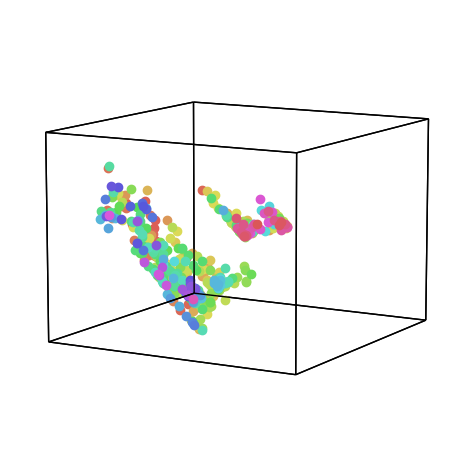

In [8]:
#Boston dataset
hyp.plot(boston, 'o', hue=np.array(boston.index), reduce='FastICA'); #each dot is a home, colored by sale price

/usr/local/lib/python3.9/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


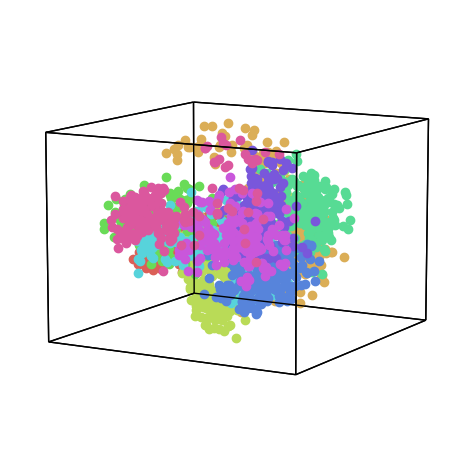

In [9]:
#Digits dataset
hyp.plot(digits, 'o', hue=np.array(digits.index)); #each digit is a drawn digit, colored by the number it refers to

/usr/local/lib/python3.9/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


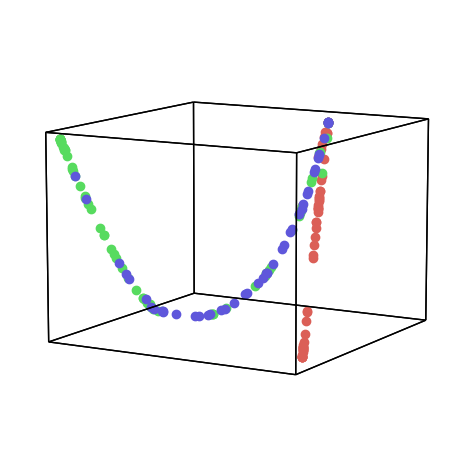

In [10]:
#Wine dataset
hyp.plot(wine, 'o', hue=np.array(wine.index), reduce='SpectralEmbedding'); #each dot is a wine, colored by 

# Visualizing some raw data

The `digits` dataset contains 8x8 drawings of different digits.  The hypertools plot above suggests that drawings of different digits are "clustered" in different ways.  Let's visualize a few example digits using seaborn heatmaps

Digit identity: 0


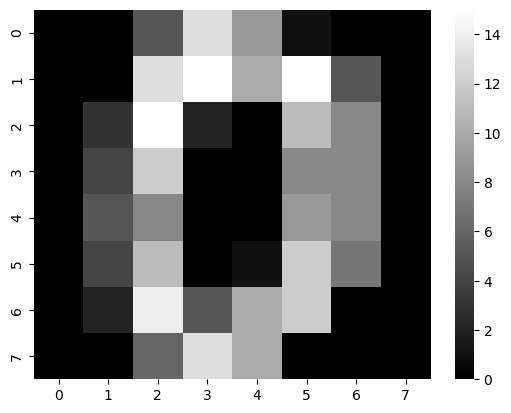

Digit identity: 1


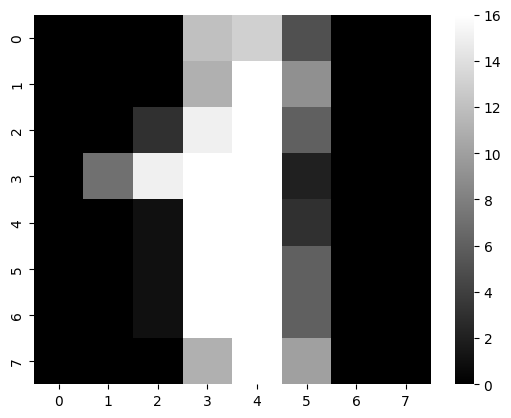

Digit identity: 2


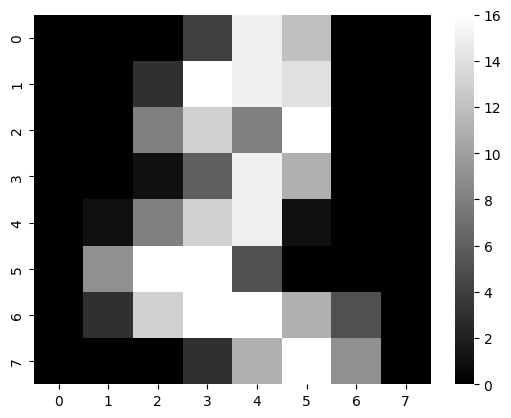

Digit identity: 3


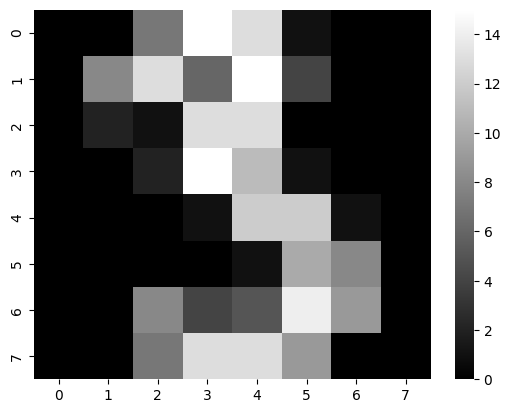

Digit identity: 4


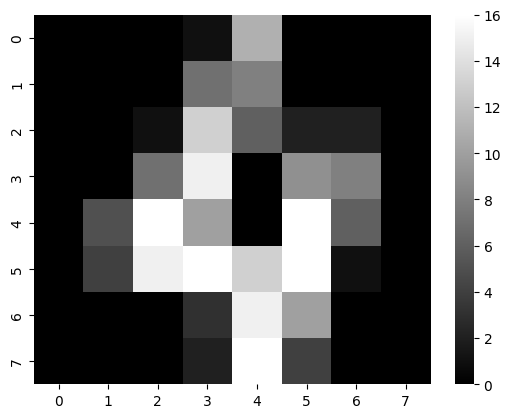

Digit identity: 5


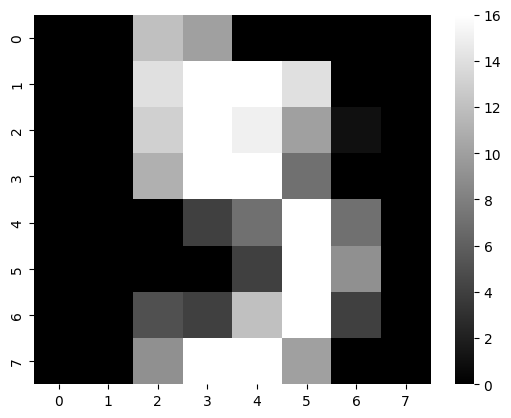

Digit identity: 6


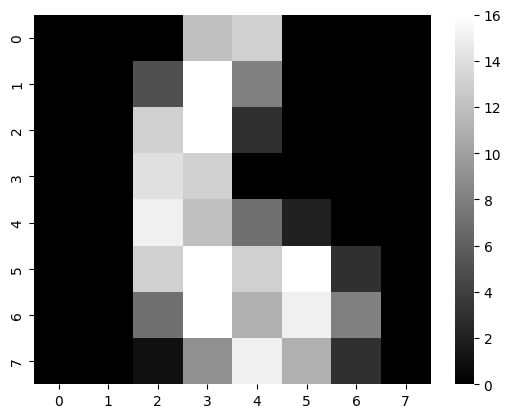

Digit identity: 7


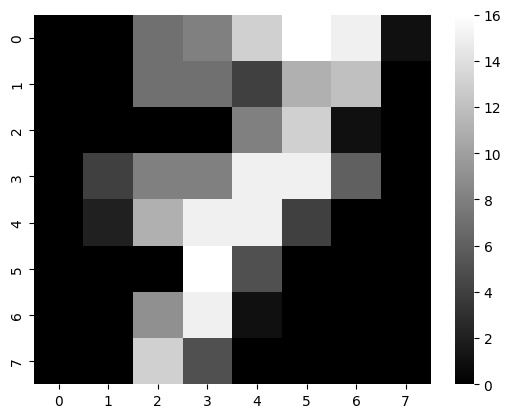

Digit identity: 8


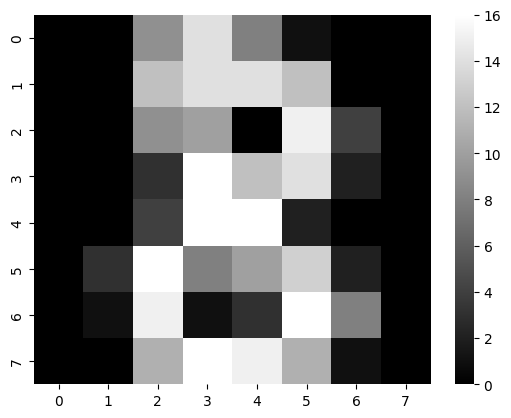

Digit identity: 9


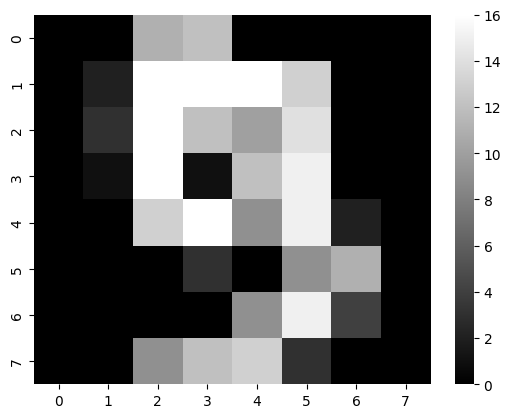

In [11]:
#plot the first 10 example digits from the dataset
for i in range(10):
    print(f'Digit identity: {digits.index[i]}')
    sns.heatmap(np.reshape(digits.iloc[i].values, [8, 8]), cmap='gray')
    plt.show()

# Scatterplots with plotly express

In [12]:
px.scatter(boston, x='AGE', y='TAX')

In [13]:
px.scatter_3d(wine, x='alcohol', y='magnesium', z='ash', color='hue', size='color_intensity')

# Simple line plot with matplotlib

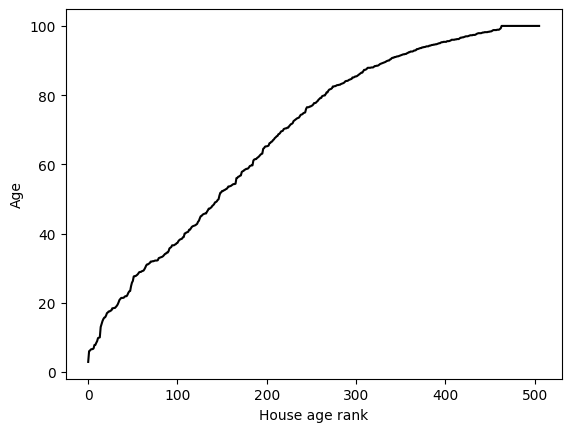

In [14]:
plt.plot(np.sort(boston.AGE), 'k-');
plt.xlabel('House age rank');
plt.ylabel('Age');

# Grouped bar plots with seaborn
We'll use a new example dataset that works well for this example:
  - `titanic`: list of Titanic passengers and their attributes

In [15]:
titanic = sns.load_dataset("titanic")

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


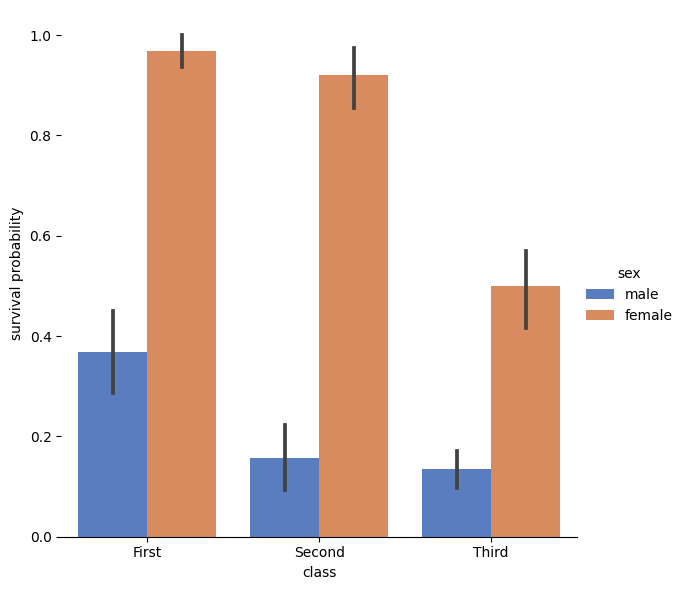

In [17]:
#source: https://seaborn.pydata.org/examples/grouped_barplot.html
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

# Many other example plots using plotly express
We'll use a new dataset for these examples:
  - `gapminder`: a dataset of life expectancy information by year and location

In [18]:
#source: https://nbviewer.jupyter.org/github/plotly/plotly_express/blob/master/walkthrough.ipynb
gapminder = px.data.gapminder()
gapminder2007 = gapminder.query("year == 2007")

In [19]:
gapminder2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [20]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60, hover_name="country")

In [21]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60,
          hover_name="country", facet_col="continent", log_x=True)

In [22]:
#neat animation
px.scatter(gapminder, x="gdpPercap", y="lifeExp",size="pop", size_max=60, color="continent", hover_name="country", 
           animation_frame="year", animation_group="country", log_x=True, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))

In [23]:
px.choropleth(gapminder, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year",
              color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

# Where do you go from here?

Useful tutorials from each of the libraries we've explored here:
  - [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)
  - [Seaborn tutorials](https://seaborn.pydata.org/tutorial.html)
  - [Hypertools tutorials](https://hypertools.readthedocs.io/en/latest/tutorials.html)
  - [Plotly Express tutorials](https://www.plotly.express/)

Use the course textbooks for inspiration!

For inspiration, also search for things like:
  - data visualization
  - storytelling with data
  - infographic